In [4]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 

os.getcwd() 
os.chdir('/Users/amitmishra/Downloads/Datasets')
marketing = pd.read_csv('marketingdata.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_31789/2224630043.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketingdata.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_31789/2224630043.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketingdata.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
/var/folders/85/d_fv83j92kq22pp6q4hcdzmh0000gp/T/ipykernel_31789/2224630043.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected,

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [6]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

In [7]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

In [8]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [9]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [10]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [11]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


In [12]:
#Exploratory analysis

In [13]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

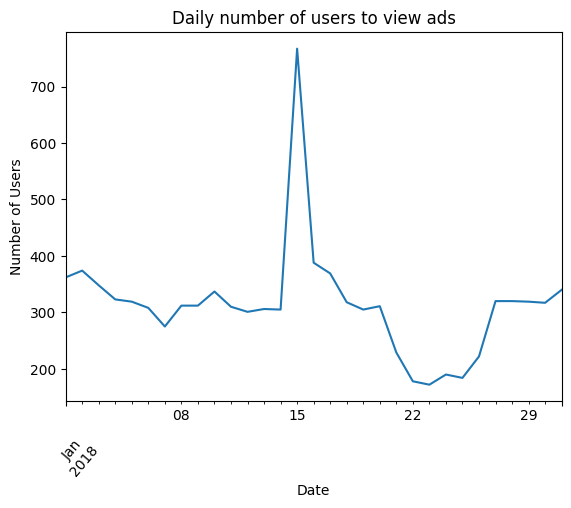

In [14]:
daily_users.plot(kind = 'line')

plt.title('Daily number of users to view ads')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation = 50)
plt.show()

In [15]:
'''As we can see, there is a huge spike in the middle of the month. 
This is because of a marketing email that reached users that are not a daily visitor of the site.'''    

'As we can see, there is a huge spike in the middle of the month. \nThis is because of a marketing email that reached users that are not a daily visitor of the site.'

In [16]:
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang', 'DoW'],
      dtype='object')

In [17]:
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

In [18]:
total = marketing['user_id'].nunique()

In [19]:
conv_rate = subscribers/total
print(round(conv_rate*100,2), '%')

13.89 %


In [20]:
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

In [21]:
retention = retained/subscribers
print(round(retention*100,2), '%')

686.4 %


In [22]:
#Segmenting

In [23]:
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()

In [24]:
retention_rate = retained/subscribers
print(f'Retention rate for house ads is: {round(retention_rate*100,2)}%')

Retention rate for house ads is: 58.05%


In [25]:
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
retained

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

<Axes: xlabel='subscribing_channel'>

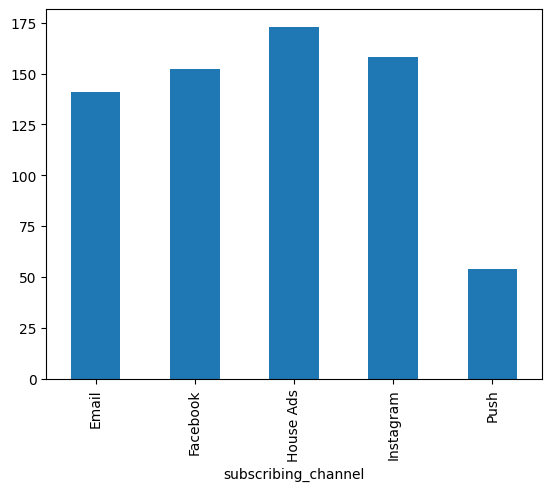

In [26]:
retained.plot(kind = 'bar')

In [27]:
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
subscribers

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

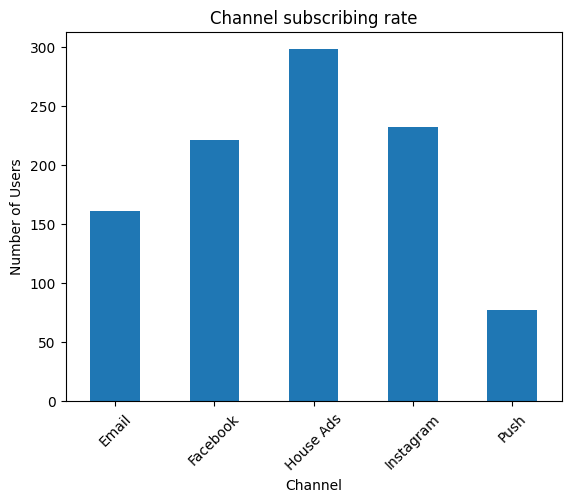

In [28]:
subscribers.plot(kind = 'bar')
plt.title('Channel subscribing rate')
plt.xlabel('Channel')
plt.ylabel('Number of Users')
plt.xticks(rotation = 45)
plt.show()

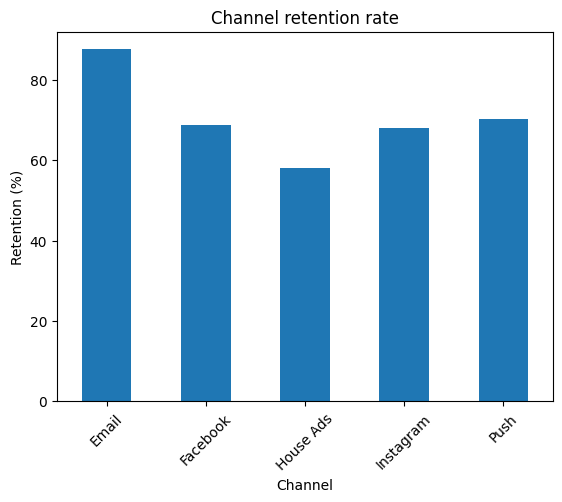

In [29]:
channel_retention_rate = (retained/subscribers)*100
channel_retention_rate.plot(kind='bar')
plt.title('Channel retention rate')
plt.xlabel('Channel')
plt.ylabel('Retention (%)')
plt.xticks(rotation = 45)
plt.show()


In [30]:
#It appreas that email has the highest retention rate from our marketing channels

In [31]:
#Compare language conversion rate

english_speakers = marketing[marketing['language_displayed'] == 'English']
total = english_speakers['user_id'].nunique()


In [32]:
# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()   

In [33]:
# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [34]:
#comparing english to the rest

In [35]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

In [36]:
# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


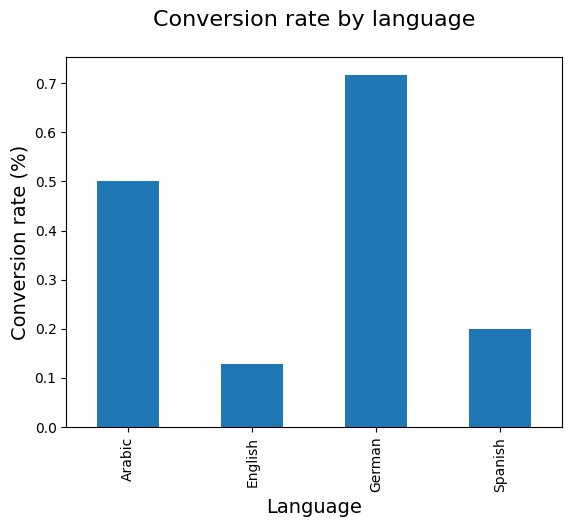

In [37]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')


plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)
plt.show()

In [43]:
#The plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers.



In [38]:
#Aggregating by date

In [39]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


In [45]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served','conversion_rate']

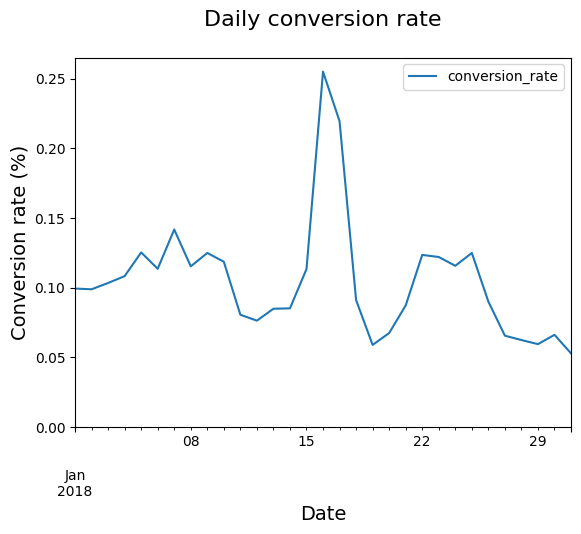

In [46]:
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
plt.ylim(0)
plt.show()

In [ ]:
#We have a steady conversion rate except for one day which peaked.

In [40]:
# Group by date_served and count unique users
subscribed = marketing.groupby(['date_subscribed'])['user_id'].nunique()

# Group by date_served and sum conversions
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_retention_rate = retained/subscribed
print(daily_retention_rate)

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64


In [41]:
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

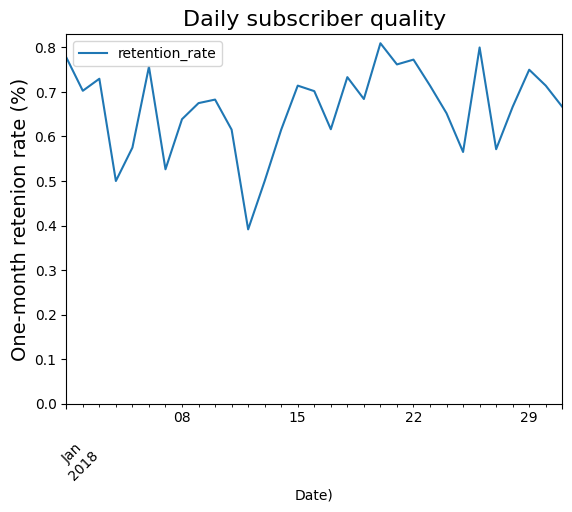

In [42]:
daily_retention_rate.plot('date_subscribed', 'retention_rate')

plt.title('Daily subscriber quality', size = 16)
plt.ylabel('One-month retenion rate (%)', size = 14)
plt.xlabel('Date)')
plt.xticks(rotation = 45)

plt.ylim(0)
plt.show()

In [ ]:
#marketing channels across age groups

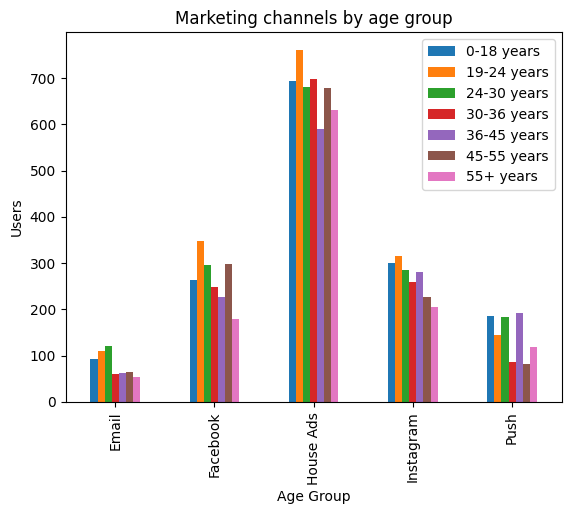

In [47]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right',labels = channel_age_df.columns.values)
plt.show()

In [ ]:
#Takeaways: Email is not reaching older age groups, and Facebook is not reaching many people under 18.

In [48]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [49]:
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


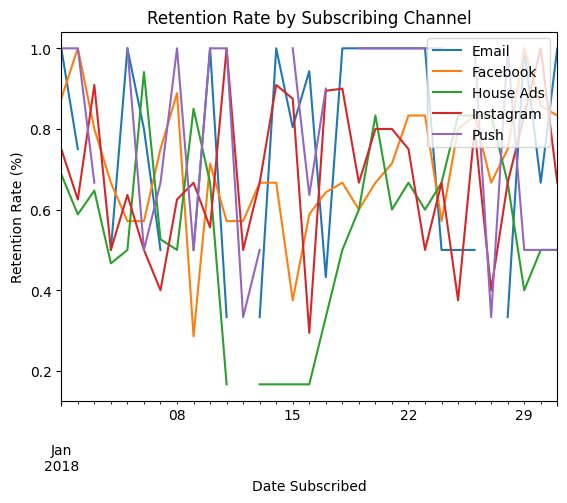

In [51]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right',labels = retention_rate_df.columns.values)
plt.show()

In [54]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

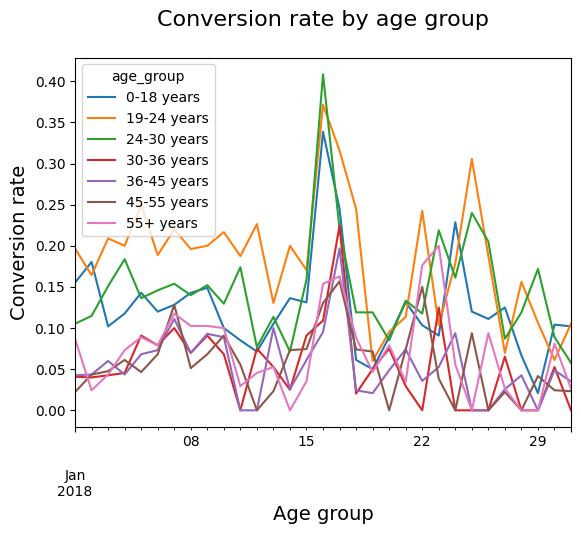

In [55]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served','age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [56]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n',size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()
        plt.clf()

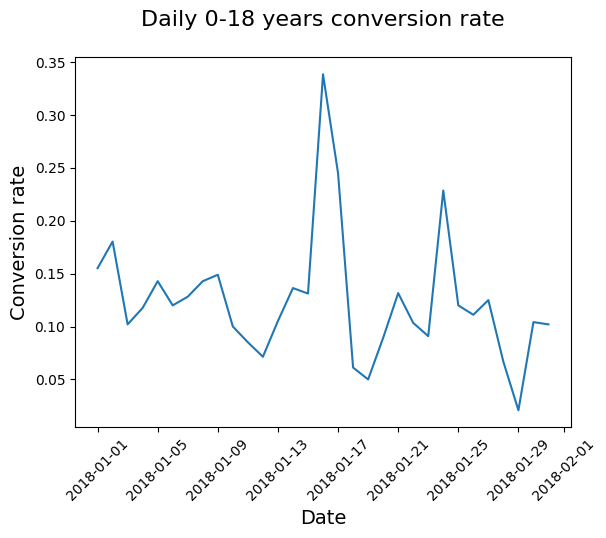

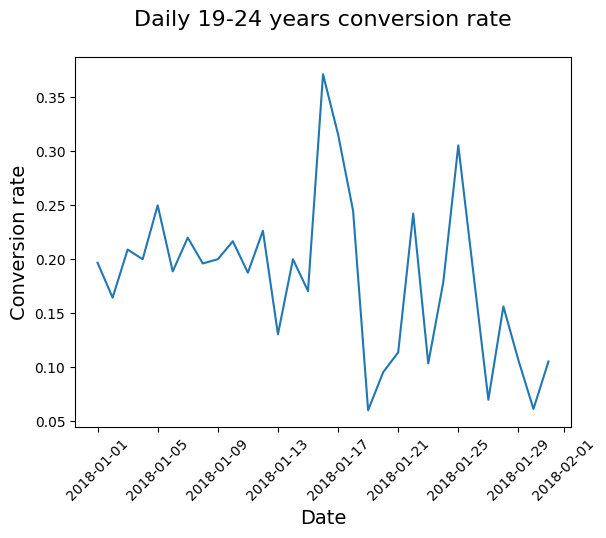

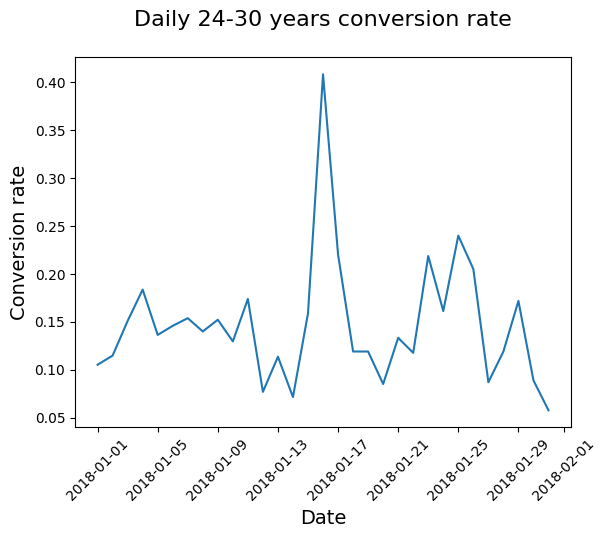

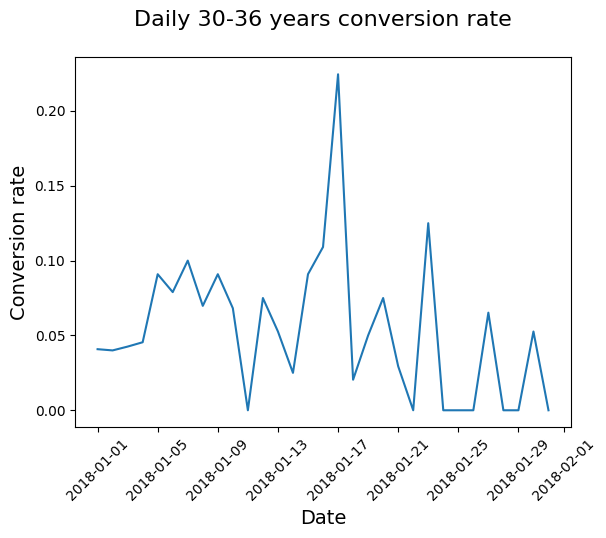

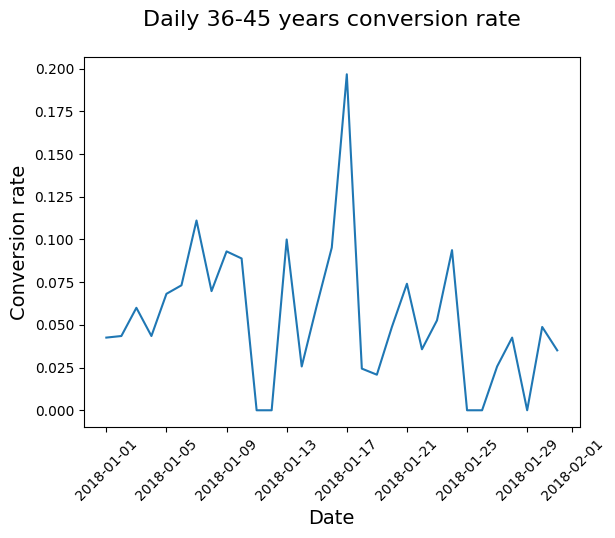

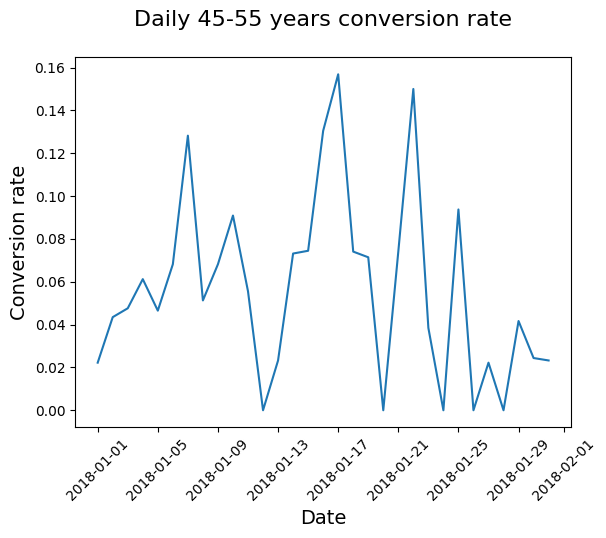

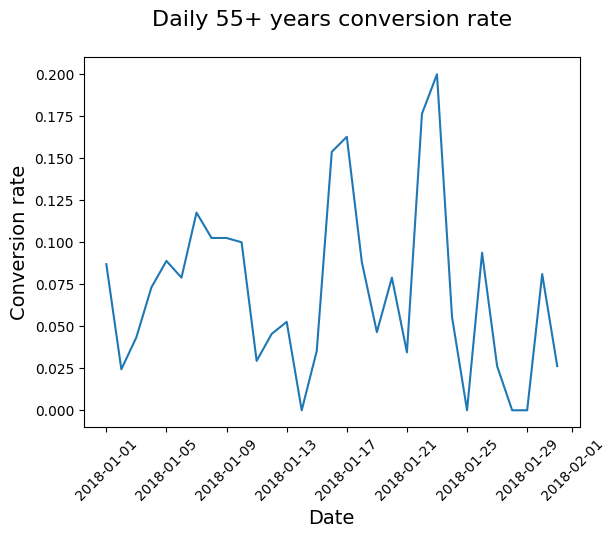

<Figure size 640x480 with 0 Axes>

In [58]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)